In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df_mv = pd.read_csv("meanVariances.csv", index_col = [0])
#df_mv = df_mv.loc[df_mv['type_of_gene']=='protein-coding']
df_mv.head()

,mean,type_of_gene,variance,occurrence
ENSG00000242268,0.614475,intergenic,0.894091,1254.0
ENSG00000270112,0.345251,unknown,0.160361,298.0
ENSG00000167578,3.861120,protein-coding,6.342790,4999.0
ENSG00000273842,0.436278,unknown,0.190666,81.0
ENSG00000078237,4.459130,protein-coding,17.953300,4997.0


In [3]:
means = df_mv['mean'].values
variances = df_mv['variance'].values
occurrences = np.array(df_mv['occurrence'].values, dtype=long)
len(means)

57792

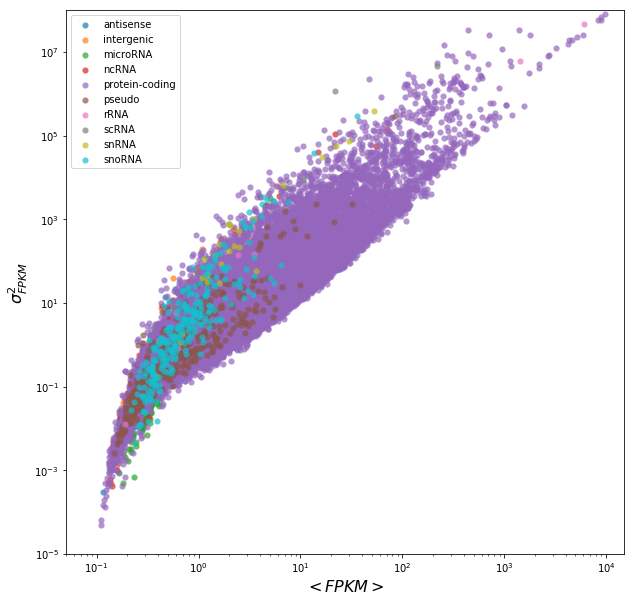

In [5]:
## Plot by class

types_of_gene = np.unique(df_mv['type_of_gene'].values)
types_of_gene

xscale='log'
yscale='log'
fig = plt.figure(figsize=(10,10))
#['ncRNA', 'rRNA', 'scRNA', 'snRNA', 'snoRNA']
for type_of_gene in types_of_gene[:-1]:
    subdf = df_mv[df_mv['type_of_gene']==type_of_gene]
    plt.scatter(subdf['mean'], subdf['variance'], label = type_of_gene, marker='o', alpha=0.7, linewidths=0.1)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale(yscale)
plt.xscale(xscale)
plt.ylim(1e-5, 1e8)
plt.xlim(5e-2, 1.5e4)
plt.legend()
plt.show()
fig.savefig('allgenes_classes_known_'+yscale+xscale+'.png')

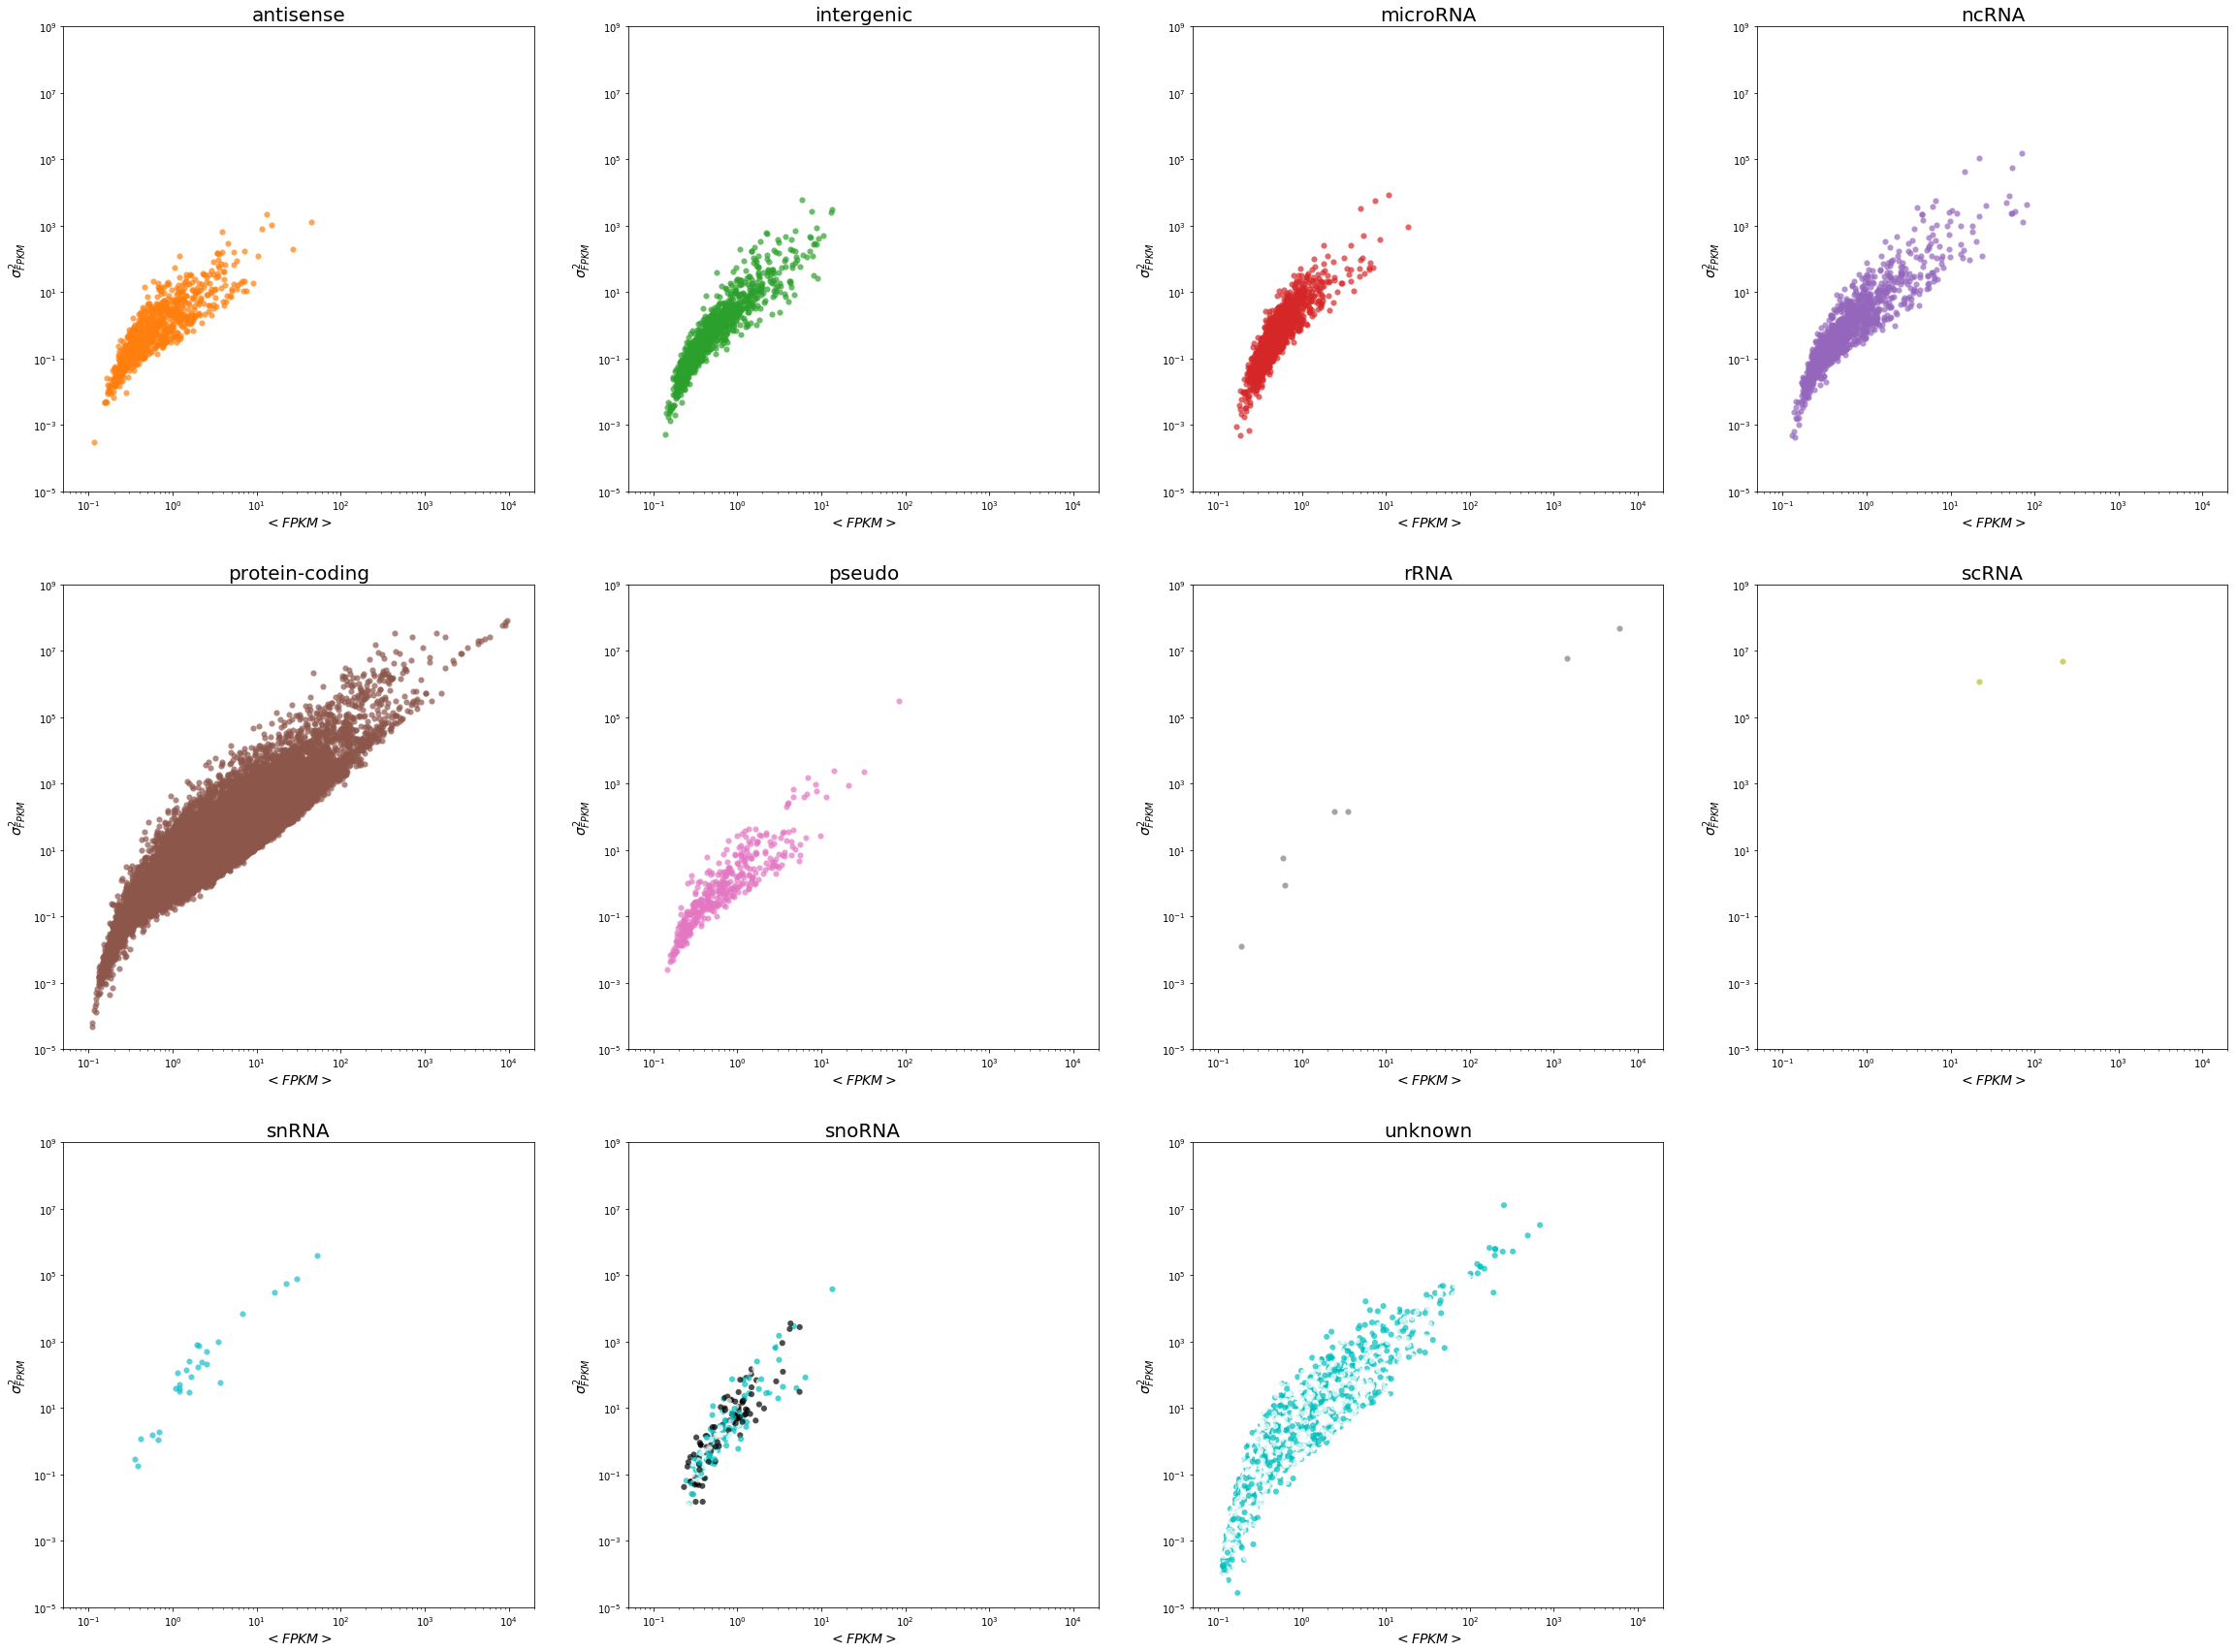

In [10]:
xscale='log'
yscale='log'
fig = plt.figure(figsize=(40,30))
pindex = 1
for type_of_gene in types_of_gene:
    ax = plt.subplot(3,4,pindex)
    subdf = df_mv[df_mv['type_of_gene']==type_of_gene]
    ax.scatter(subdf['mean'], subdf['variance'], label = type_of_gene, marker='o', alpha=0.7, linewidths=0.1, c='C'+str(pindex))
    ax.set_title(type_of_gene, fontsize=20)
    plt.xlabel("$<FPKM>$", fontsize=14)
    plt.ylabel("$\sigma^2_{FPKM}$", fontsize=14)
    plt.yscale(yscale)
    plt.xscale(xscale)
    plt.ylim(1e-5, 1e9)
    plt.xlim(5e-2, 2e4)
    pindex+=1
plt.show()
fig.savefig('allgenes_perclasses_'+yscale+xscale+'.png')

## specific class

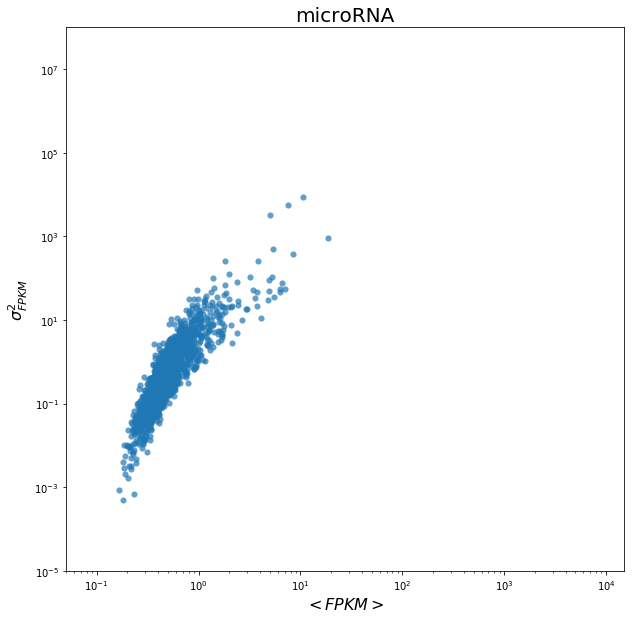

In [14]:
type_of_gene = 'microRNA'


xscale='log'
yscale='log'
fig = plt.figure(figsize=(10,10))
subdf = df_mv[df_mv['type_of_gene']==type_of_gene]
plt.scatter(subdf['mean'], subdf['variance'], label = type_of_gene, marker='o', alpha=0.7, linewidths=0.1)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale(yscale)
plt.xscale(xscale)
plt.ylim(1e-5, 1e8)
plt.xlim(5e-2, 1.5e4)
plt.title(type_of_gene, fontsize=20)
plt.show()
fig.savefig('%s_'%type_of_gene+yscale+xscale+'.png')